# BMET5933 Assignment 2 Code

## Packages Importing

In [1]:
import os

import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.exposure import equalize_hist

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, RMSprop

## Data Loading and Preprocessing

### Training Data

In [2]:
train_img_folder_n = 'chest_xray/train/NORMAL'
train_img_list_n = os.listdir(train_img_folder_n)
for i in range(len(train_img_list_n)):
    img = cv2.imread(train_img_folder_n + '/' + train_img_list_n[i])
    img_resized = cv2.resize(img, (224, 224)) #Resize to 224*224
    img_equalized = equalize_hist(img_resized) #Enhance contrast by using histogram equalisation
    curr_x = np.expand_dims(img_equalized, axis=0)    
    if i == 0:
        x_train_n = curr_x
    else:
        x_train_n = np.concatenate((x_train_n, curr_x), axis=0)
        
train_img_folder_p = 'chest_xray/train/PNEUMONIA'
train_img_list_p = os.listdir(train_img_folder_p)
for i in range(len(train_img_list_p)):
    img = cv2.imread(train_img_folder_p + '/' + train_img_list_p[i])
    img_resized = cv2.resize(img, (224, 224)) #Resize to 224*224
    img_equalized = equalize_hist(img_resized) #Enhance contrast by using histogram equalisation
    curr_x = np.expand_dims(img_equalized, axis=0)
    if i == 0:
        x_train_p = curr_x
    else:
        x_train_p = np.concatenate((x_train_p, curr_x), axis=0)

C:\Users\qjy\anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


### Test Data

In [3]:
test_img_folder_n = 'chest_xray/test/NORMAL'
test_img_list_n = os.listdir(test_img_folder_n)
for i in range(len(test_img_list_n)):
    img = cv2.imread(test_img_folder_n + '/' + test_img_list_n[i])
    img_resized = cv2.resize(img, (224, 224)) #Resize to 224*224
    img_equalized = equalize_hist(img_resized) #Enhance contrast by using histogram equalisation
    curr_x = np.expand_dims(img_equalized, axis=0)    
    if i == 0:
        x_test_n = curr_x
    else:
        x_test_n = np.concatenate((x_test_n, curr_x), axis=0)
        
test_img_folder_p = 'chest_xray/test/PNEUMONIA'
test_img_list_p = os.listdir(test_img_folder_p)
for i in range(len(test_img_list_p)):
    img = cv2.imread(test_img_folder_p + '/' + test_img_list_p[i])
    img_resized = cv2.resize(img, (224, 224)) #Resize to 224*224
    img_equalized = equalize_hist(img_resized) #Enhance contrast by using histogram equalisation
    curr_x = np.expand_dims(img_equalized, axis=0)
    if i == 0:
        x_test_p = curr_x
    else:
        x_test_p = np.concatenate((x_test_p, curr_x), axis=0)

### Putting Data Together

In [4]:
y_train_n = np.zeros(len(train_img_list_n))
y_train_p = np.ones(len(train_img_list_p))
y_test_n = np.zeros(len(test_img_list_n))
y_test_p = np.ones(len(test_img_list_p))

x_train = np.concatenate((x_train_n, x_train_p), axis=0)
y_train = np.concatenate((y_train_n, y_train_p), axis=0)
x_test = np.concatenate((x_test_n, x_test_p), axis=0)
y_test = np.concatenate((y_test_n, y_test_p), axis=0)

### Shuffling Training Data

In [5]:
np.random.seed(1)
np.random.shuffle(x_train)
np.random.seed(1)
np.random.shuffle(y_train)

### Image Display

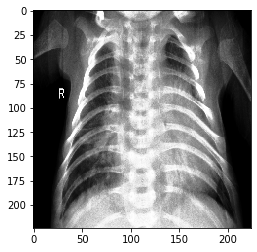

In [8]:
plt.imshow(x_train[66,:,:,0], cmap='gray')

## Model Training

In [6]:
base_model = ResNet50(classes=1, weights=None, classifier_activation="sigmoid")
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [7]:
my_model = Model(inputs=base_model.input, outputs=base_model.output)
my_model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics='accuracy')

In [8]:
history = my_model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=8, epochs=20, verbose=1) 

Epoch 1/20
332/332 [==============================] - 1096s 3s/step - loss: 0.3606 - accuracy: 0.8475 - val_loss: 8.0307 - val_accuracy: 0.6250
Epoch 2/20
332/332 [==============================] - 1120s 3s/step - loss: 0.2164 - accuracy: 0.9111 - val_loss: 2.3602 - val_accuracy: 0.6250
Epoch 3/20
332/332 [==============================] - 1149s 3s/step - loss: 0.1727 - accuracy: 0.9386 - val_loss: 0.8900 - val_accuracy: 0.6715
Epoch 4/20
332/332 [==============================] - 1264s 4s/step - loss: 0.1367 - accuracy: 0.9495 - val_loss: 0.5287 - val_accuracy: 0.8093
Epoch 5/20
332/332 [==============================] - 1231s 4s/step - loss: 0.1072 - accuracy: 0.9589 - val_loss: 0.5034 - val_accuracy: 0.8365
Epoch 6/20
332/332 [==============================] - 1047s 3s/step - loss: 0.0898 - accuracy: 0.9646 - val_loss: 0.4472 - val_accuracy: 0.8590
Epoch 7/20
332/332 [==============================] - 1045s 3s/step - loss: 0.0821 - accuracy: 0.9653 - val_loss: 0.8203 - val_accuracy:

In [9]:
my_model.save('m4.h5')

## Plotting History

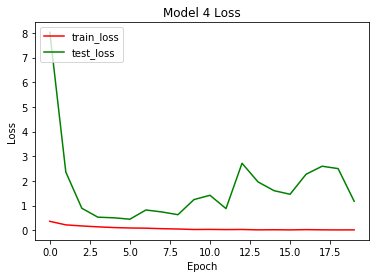

In [10]:
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='g')
plt.title('Model 4 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'test_loss'], loc='upper left')
plt.show()

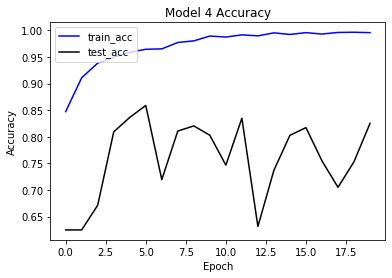

In [11]:
plt.plot(history.history['accuracy'],color='b')
plt.plot(history.history['val_accuracy'],color='k')
plt.title('Model 4 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_acc', 'test_acc'], loc='upper left')
plt.show()